In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size':20}
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

**(1)** By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of `name_distribution`and fill out the bracket with your choice again. Then please, 

**(a)** Draw the histogram and interpret

In [ ]:
distribution =  np.random.normal(50, 300, 10000)
distribution

array([ 171.3189713 ,   15.13737283,  455.02828118, ...,  648.58258452,
       -100.21908379,  421.72460119])

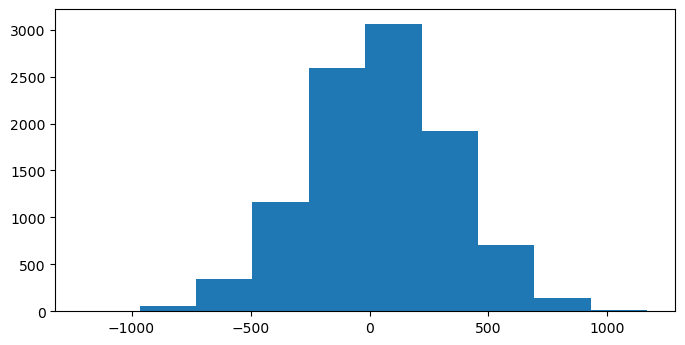

In [ ]:

plt.figure(figsize=(8,4), dpi = 100)
plt.hist(distribution)
#plt.hist(distribution, density = True)
plt.show()

### Interpret ###
Örneklemi rassal olacak ve normal dağılımdan gelecek şekilde seçiyoruz. Yani 50 ortalamaya sahip, 300 standart sapmalı ve  1000 tane de gözlemden oluşacak şekilde. Verinin dağılımını gözlemlemek içinde histogram kullanıyoruz. 'y' eksenin de frequency i gözlemleriz ve sonucu şekilde yorumlayabiliriz: 
" Normal olarak, ortalama etrafında daha fazla gözlem olduğunu ve ortalama etrafında 3000'e yakın gözlem vardır" diyebiliriz. 
Tam olarak söyleyemesek bile, -900 ve 1000 civarında ise gözlem sayısının sıfıra oldukça yakın olduğunu söyleyebiliriz.

**(b)** Draw Q-Q plot and interpret

In [ ]:
normally_distributed_data = np.random.normal(np.mean(distribution),
                                         np.std(distribution),10000)


In [ ]:
distribution.sort()
normally_distributed_data.sort()

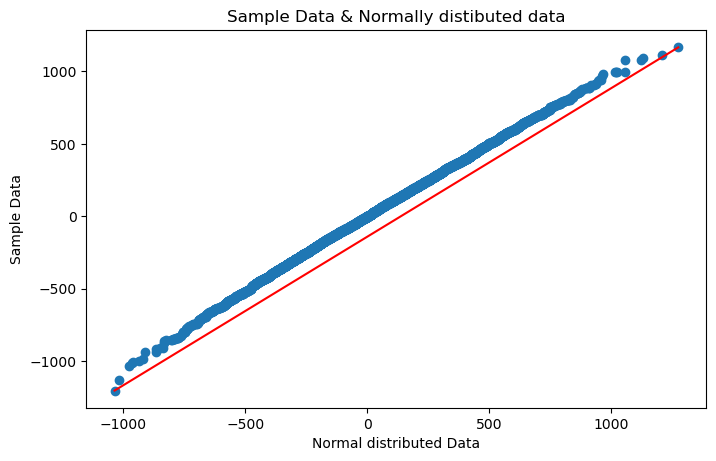

In [ ]:


plt.figure(figsize=(8,5), dpi = 100)

plt.scatter(normally_distributed_data,distribution)
plt.title('Sample Data & Normally distibuted data')
plt.xlabel('Normal distributed Data')
plt.ylabel('Sample Data')
plt.plot([np.min(normally_distributed_data),np.max(normally_distributed_data)],
        [np.min(distribution),np.max(distribution)],c='red')
plt.show()

### Interpret 
Eğer ortadaki kırmızı çizgi (45 derecelik açı)ile neredeyse birebir ilişki varsa, bazı sapmaları tolere ederek benim verim normal dağılıyor diyebiliyoruz.
Grafiğe baktığımızda ise 'sample data' nın sapma gösterdiğini söyleriz ve verinin normal dağılmadığını gözlemleyebiliriz.

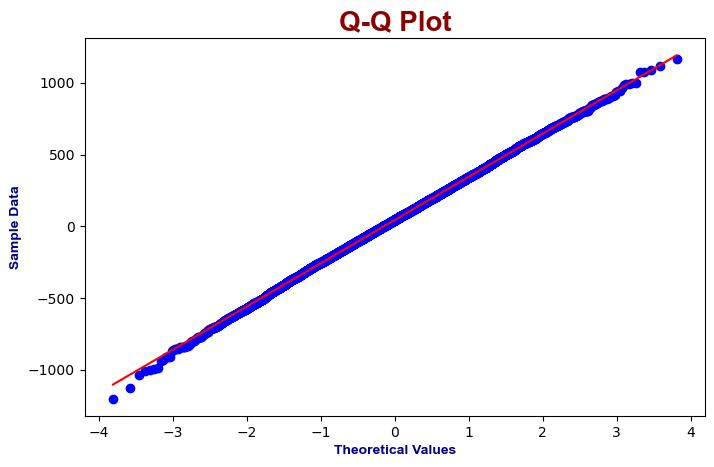

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi = 100)
nsample = 100
res = stats.probplot(distribution, plot=plt)
plt.title("Q-Q Plot", fontdict = title_font)
plt.xlabel("Theoretical Values", fontdict = axis_font)
plt.ylabel("Sample Data", fontdict = axis_font)
plt.show()

### Interpret
Ama aslında veriyi bu şekilde incelediğimizde normal dağıldığını gözlemleyebiliriz

**(2)** Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

$$P_t-P_{t-1}/P_{t-1}$$

where $P_t$ represents the stock price at time t and $P_{t-1}$ denotes the stock price at time t-1. What do you think about the return distribution? 

**Note:** Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use `yfinance` library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('GOOG.csv', parse_dates=["Date"], low_memory=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       503 non-null    datetime64[ns]
 1   Open       503 non-null    float64       
 2   High       503 non-null    float64       
 3   Low        503 non-null    float64       
 4   Close      503 non-null    float64       
 5   Adj Close  503 non-null    float64       
 6   Volume     503 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.6 KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-30,550.109680,551.954590,546.669128,550.518555,550.518555,1287525
1,2015-03-31,548.494080,553.191223,545.223083,546.499573,546.499573,1588048
2,2015-04-01,547.097961,549.630981,538.022888,541.074463,541.074463,1963075
3,2015-04-02,539.369141,539.369141,532.385315,534.063721,534.063721,1716399
4,2015-04-06,530.762817,536.935852,528.120056,535.295349,535.295349,1324426


In [ ]:
df["stock_price"] = (df["Volume"] - df["Volume"].shift(1))/df["Volume"].shift(1)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock_price
0,2015-03-30,550.109680,551.954590,546.669128,550.518555,550.518555,1287525,NaN
1,2015-03-31,548.494080,553.191223,545.223083,546.499573,546.499573,1588048,0.233411
2,2015-04-01,547.097961,549.630981,538.022888,541.074463,541.074463,1963075,0.236156
3,2015-04-02,539.369141,539.369141,532.385315,534.063721,534.063721,1716399,-0.125658
4,2015-04-06,530.762817,536.935852,528.120056,535.295349,535.295349,1324426,-0.228369


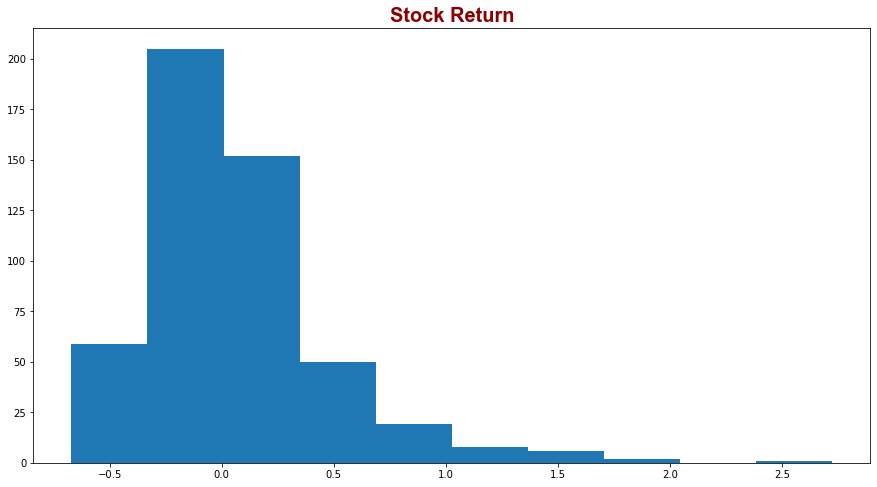

In [ ]:
plt.figure(figsize=(15, 8))

plt.title('Stock Return', fontdict=title_font)
plt.hist(df['stock_price'].dropna())
plt.show()

Normally distribution 'nın positively(right) skewed şeklinde dönüş sağladığını gözlemleyebiliriz.